<a href="https://colab.research.google.com/github/GouravSinghal22/Intro-to-AI-and-ML/blob/main/PCA(EXP_5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA (Principal component analysis)
1. PCA is the dimensionality of reduction technique
2. Main concept behind PCA is feature extraction, that is, features of dataset should be less and similarity between features should be less.
3. In PCA new feature are extracted from original feature, which are quite dissimilar in nature.
4. Show in PCA,N-dimensional feature space Get transformed into M-dimensional features
## M<N

In [1]:
import random
import pandas as pd
import numpy as np
from scipy import stats
import csv
from sklearn.decomposition import PCA

1. reduce the number of input variables or features in a dataset while preserving the most important information

2. The primary goal of dimensionality reduction is to simplify the data, make it more manageable, and often improve the performance of machine learning models.

In [2]:
# data generation
# Generate random values for X and Y
data = [(random.randint(1, 100), random.randint(1, 100)) for _ in range(100)]

# Define the CSV file path
csv_file = 'random_values.csv'

# Write the data to the CSV file
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)

    # Write the header row (optional)
    writer.writerow(['X', 'Y'])

    # Write the data rows
    writer.writerows(data)

print(f'Data saved to {csv_file}')

Data saved to random_values.csv


## To transform feature in comparable scale we used data standardization
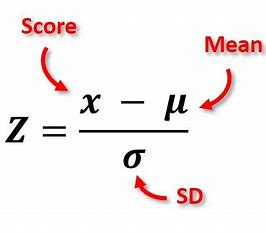

In [3]:
# step 1 : Standardize the data
df=pd.read_csv("/content/random_values.csv")
print(df)

# Calculate the mean and standard deviation for columns X and Y
mean_x = df['X'].mean()
std_dev_x = df['X'].std()

mean_y = df['Y'].mean()
std_dev_y = df['Y'].std()

# Print the results
print(f"Mean for Column X: {mean_x}")
print(f"Standard Deviation for Column X: {std_dev_x}")
print(f"Mean for Column Y: {mean_y}")
print(f"Standard Deviation for Column Y: {std_dev_y}")

# Calculate the Z-scores for columns X and Y
df['zscore_x'] = stats.zscore(df['X'])
df['zscore_y'] = stats.zscore(df['Y'])

# Print the updated DataFrame with Z-scores
print(df)

     X   Y
0   31  76
1   67  75
2   40  53
3    7  96
4   12  93
..  ..  ..
95  27  51
96  52  27
97   9  98
98  42  38
99  70  61

[100 rows x 2 columns]
Mean for Column X: 50.2
Standard Deviation for Column X: 26.71208253834496
Mean for Column Y: 52.08
Standard Deviation for Column Y: 28.682757992574665
     X   Y  zscore_x  zscore_y
0   31  76 -0.722397  0.838152
1   67  75  0.632097  0.803112
2   40  53 -0.383773  0.032237
3    7  96 -1.625393  1.538948
4   12  93 -1.437269  1.433828
..  ..  ..       ...       ...
95  27  51 -0.872896 -0.037843
96  52  27  0.067725 -0.878798
97   9  98 -1.550143  1.609027
98  42  38 -0.308524 -0.493360
99  70  61  0.744972  0.312555

[100 rows x 4 columns]


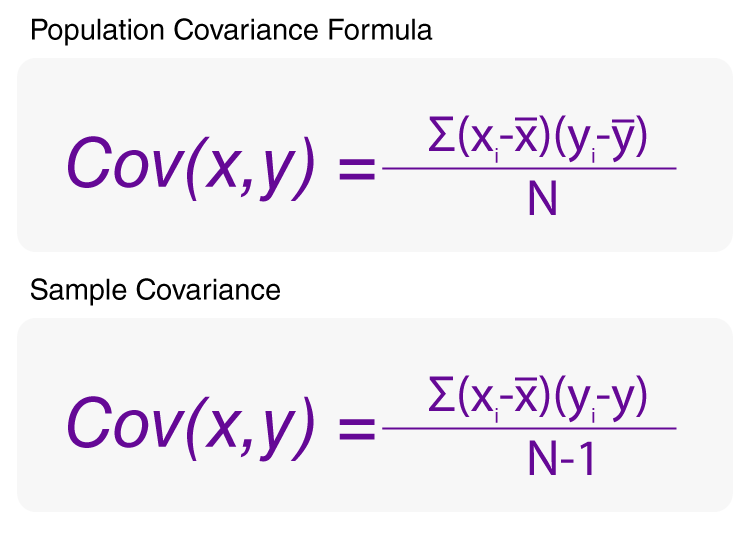

The main work of a covariance matrix is to describe the statistical relationship between multiple variables. Specifically, the covariance matrix is used to analyze the linear relationships and degree of correlation between pairs of variables in a dataset

In [4]:
# step 2: compute the covariance matrix (mearsure between 2 variable or feature)
# measure only the directional relationship between 2 variable not the strength of the relationship between them

# Calculate the covariance matrix for columns X and Y
covariance_matrix = np.cov(df[['X', 'Y']], rowvar=False)

# Print the covariance matrix
print("Covariance Matrix:")
print(covariance_matrix)

Covariance Matrix:
[[713.53535354  23.65050505]
 [ 23.65050505 822.70060606]]


In [5]:
# step 3: calculate eigen vector ad eigrn values

eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
# numpy.linalg module. It is used to compute the eigenvalues and eigenvectors of a square matrix.

# Print eigenvalues and eigenvectors
print("Eigenvalues:")
print(eigenvalues)

print("\nEigenvectors:")
print(eigenvectors)

Eigenvalues:
[708.63176729 827.60419231]

Eigenvectors:
[[-0.97917508 -0.20301763]
 [ 0.20301763 -0.97917508]]


In [6]:
# step 4: Sort eigen values in descending order and compute the principle components
# sort
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# The principal components are the sorted eigenvectors
principal_components = sorted_eigenvectors

# Print the sorted eigenvalues and principal components
print("Sorted Eigenvalues:")
print(sorted_eigenvalues)

print("\nPrincipal Components:")
print(principal_components)

Sorted Eigenvalues:
[827.60419231 708.63176729]

Principal Components:
[[-0.20301763 -0.97917508]
 [-0.97917508  0.20301763]]


PCA is primarily used for dimensionality reduction by creating new orthogonal (uncorrelated) variables, called principal components, that capture the most significant variance in the data.
Feature selection methods, on the other hand, involve selecting a subset of the original features (variables) to use in the model, without creating new variables.

In [7]:
# Step 5: Reduce the dimension of the dataset
z_scores = stats.zscore(df[['X', 'Y']])
pca = PCA(n_components=1)  # Specify the number of components you want to keep
X_reduced = pca.fit_transform(z_scores)

# Create a DataFrame with the reduced dimension
df_reduced = pd.DataFrame(data=X_reduced, columns=['Principal_Component_1'])

# Print the results


print("Reduced Dimension DataFrame:")
print(df_reduced)

Reduced Dimension DataFrame:
    Principal_Component_1
0               -0.081851
1               -1.014846
2                0.248574
3                0.061126
4                0.002433
..                    ...
95               0.643990
96               0.573515
97              -0.041637
98               0.567018
99              -0.747784

[100 rows x 1 columns]


Data saved to random2_values.csv
     X   Y  zscore_x  zscore_y
0   27   1 -0.829890 -1.868830
1   33  22 -0.620145 -1.136229
2   49  35 -0.060826 -0.682714
3   17  54 -1.179464 -0.019885
4   69  63  0.638323  0.294087
..  ..  ..       ...       ...
95  65  92  0.498493  1.305774
96  73  73  0.778153  0.642944
97  64  64  0.463536  0.328973
98  28  22 -0.794932 -1.136229
99  88   9  1.302514 -1.589744

[100 rows x 4 columns]
Covariance Matrix:
[[1.         0.14029147]
 [0.14029147 1.        ]]
Eigenvalues:
[0.86 1.14]

Eigenvectors:
[[-0.707 -0.707]
 [ 0.707 -0.707]]
Sorted Eigenvalues:
[1.14 0.86]

Principal Components:
[[-0.707 -0.707]
 [-0.707  0.707]]


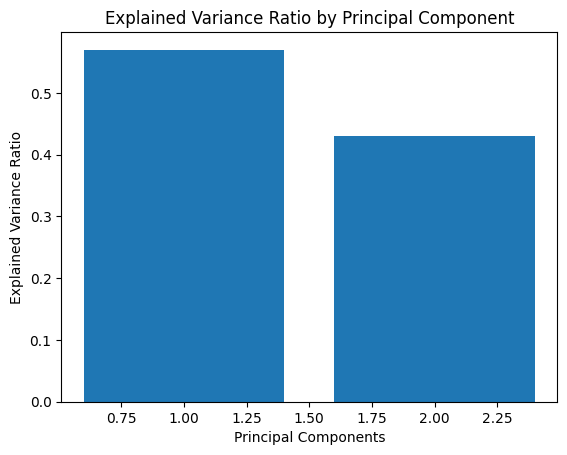


Reduced Data:
         PC1
0   1.907995
1   1.241756
2   0.525683
3   0.847940
4  -0.659214
..       ...
95 -1.275617
96 -1.004716
97 -0.560303
98  1.365331
99  0.203071

[100 rows x 1 columns]


In [8]:
import random
import pandas as pd
import numpy as np
from scipy import stats
import csv
import matplotlib.pyplot as plt

# Data generation
data = [(random.randint(1, 100), random.randint(1, 100)) for _ in range(100)]

# Define the CSV file path
csv_file = 'random2_values.csv'

# Write the data to the CSV file
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)

    # Write the header row (optional)
    writer.writerow(['X', 'Y'])

    # Write the data rows
    writer.writerows(data)

print(f'Data saved to {csv_file}')

# Step 1: Standardize the data
df = pd.read_csv(csv_file)
df['zscore_x'] = (df['X'] - df['X'].mean()) / df['X'].std()
df['zscore_y'] = (df['Y'] - df['Y'].mean()) / df['Y'].std()

# Print standardized data
print(df)

# Step 2: Compute the covariance matrix
covariance_matrix = np.cov(df[['zscore_x', 'zscore_y']], rowvar=False)

# Print the covariance matrix
print("Covariance Matrix:")
print(covariance_matrix)

# Step 3: Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# Round eigenvalues and eigenvectors for readability
eigenvalues = np.round(eigenvalues, 3)
eigenvectors = np.round(eigenvectors, 3)

# Print eigenvalues and eigenvectors
print("Eigenvalues:")
print(eigenvalues)

print("\nEigenvectors:")
print(eigenvectors)

# Step 4: Sort eigenvalues and compute principal components
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# The principal components are the sorted eigenvectors
principal_components = sorted_eigenvectors

# Print sorted eigenvalues and principal components
print("Sorted Eigenvalues:")
print(sorted_eigenvalues)

print("\nPrincipal Components:")
print(principal_components)

# Step 5: Reduce the dimension of datasets
# You can choose how many principal components to retain based on explained variance

# Calculate explained variance ratio
explained_variance_ratio = sorted_eigenvalues / np.sum(sorted_eigenvalues)

# Plot explained variance ratio
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.show()

# You can decide how many principal components to keep based on the plot above
num_components_to_keep = 1  # Adjust this based on your choice

# Reduce dimensionality
reduced_data = np.dot(df[['zscore_x', 'zscore_y']], principal_components[:, :num_components_to_keep])

# Store the reduced data in a DataFrame
reduced_df = pd.DataFrame(data=reduced_data, columns=[f'PC{i}' for i in range(1, num_components_to_keep + 1)])

# Print the reduced data
print("\nReduced Data:")
print(reduced_df)
